## Introduction

The following results are based on training done with OCTIS using the Reddit dataset composed by two corpus: one with posts written in portuguese and the other with posts written in english. Typical preprocessing steps done were tokenization, lemmatization, stopwords removal, part-of-speech labeling, undesired part-of-speech categories removal and vocabulary filtering.

Train, test and validation datasets were created using the original one, for each training. The division was done as follows: 70\% of documents for training, 20\% for testing and 10\% for validation.

The hyperparameters used during optimization were:

No que tange aos hiperparâmetros empregados durante a otimização, informações relevantes sobre os resultados são as seguintes:

* the number of topics range was $K \in [3, 5]$ for the training based around the portuguese dataset;
* the number of topics range was $K \in [5, 20]$ for the training based around the english dataset;
* for neural network-based archhitectures like ETM and CTM, learning rate was varied. For ETM, $lr \in [5*10^{-3},5*10^{-1}]$, and for CTM, $lr \in [2*10^{-3},2*10^{-1}]$. 

## Code

In [ ]:
!pip install wordcloud

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import json
from os import makedirs
from os.path import dirname
from wordcloud import WordCloud
from google.colab import drive
from pandas import DataFrame
from torch.nn import Softmax
from torch import from_numpy
softmax = Softmax(dim=1)
drive.mount('/content/drive')

def get_results_summary(results_file):
    results = json.load(open(results_file, "r"))

    sorted_indices = np.argsort(results["f_val"])[::-1]

    metric = results["metric_name"]
    metric_key = metric.lower()

    rows = []
    for index in sorted_indices:
      row = {
          'model_name': results["model_name"],
          metric_key: results["f_val"][index],
      }
      for key, value in results["x_iters"].items():
          row[key] = value[index]
      
      best_iteration = np.argmax(results["dict_model_runs"][metric][f'iteration_{index}'])
      row["best_interation_for_model"] = int(best_iteration)
      row["path"] = f'{int(index)}_{int(best_iteration)}.npz'
      rows.append(row)
    return rows


def get_combined_results_summary(*files):
  results = []
  for f in files:
    results += get_results_summary(f)
  df = DataFrame.from_records(results)
  return df.sort_values(by="coherence", ascending=False)


def get_normalized_topic_word_dist(raw_topic_word_dist):
  return softmax(from_numpy(raw_topic_word_dist))

def parse_json(json_file):
  results = json.load(open(json_file))
  data = {"x": {}}
  data["y"] = np.array(results["f_val"])
  for key, values in results["x_iters"].items():
    data["x"][key] = np.array(values)
  return data

def plot_graph(datas, legends, x_label, y_label):
  fig, ax = plt.subplots(1)

  plots = []

  for data in datas:
      ordered_indices = np.argsort(data["x"])
      ordered_y = data["y"][ordered_indices]
      plot, = ax.plot(data["x"][ordered_indices], ordered_y)
      plots.append(plot)
  
  ax.legend(tuple(plots), tuple(legends), loc="upper left", shadow=True)

  ax.set(xlabel=x_label, ylabel=y_label)
  plt.plot()


def plot_wordcloud_by_word_probability(model_name, index, topics, topic_word_prob_dists):
    """Creates a wordcloud graph using words sized by their probabilities.

    Parameters:

    topics (list of str): topic words
    
    topic_word_prob_dists (dict): probabilities for each word inside the topic (unordered)
    """
    topic = topics[index]
    topic_word_prob_dist = topic_word_prob_dists[index]

    prob_dists = np.sort(topic_word_prob_dist)[::-1][:len(topic)]
    
    word_dist_mapping = {}
    for i in range(len(topic)):
      word_dist_mapping[topic[i]] = float(prob_dists[i])

    print(json.dumps(word_dist_mapping, indent=4))
    fig, ax = plt.subplots(1)

    color_map = cm.get_cmap("gist_rainbow")
    cloud = WordCloud(background_color='white',
                    width=1400,
                    height=800,
                    max_words=20,
                    colormap=color_map)


    cloud.generate_from_frequencies(word_dist_mapping)
    plt.imshow(cloud)
    plt.axis('off')

    path = f'{TOPIC_IMAGES_FOLDER}/{model_name}/{index+1}.pdf'
    makedirs(dirname(path), exist_ok=True)
    fig.savefig(path, format='pdf', bbox_inches='tight')

    plt.show()

get_n_topics_data = lambda data: ({"x": data["x"]["num_topics"], "y": data["y"]})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
TOPIC_IMAGES_FOLDER = "./images/topics"
OPTIMIZATIONS_FOLDER = "./optimizations"
LDA_PT_FOLDER = f'{OPTIMIZATIONS_FOLDER}/20220123102218634653_LDA_pt'
CTM_PT_FOLDER = f'{OPTIMIZATIONS_FOLDER}/20220123103201433493_CTM_pt'
ETM_PT_FOLDER = f'{OPTIMIZATIONS_FOLDER}/20220123113328343683_ETM_pt'
LDA_EN_FOLDER = f'{OPTIMIZATIONS_FOLDER}/20220111090345340370_LDA_en'
CTM_EN_FOLDER = f'{OPTIMIZATIONS_FOLDER}/20220111141407705455_CTM_en'
ETM_EN_FOLDER = f'{OPTIMIZATIONS_FOLDER}/20220111110313008291_ETM_en'

In [ ]:
cd /content/drive/MyDrive/UFF/Notebooks/2022/02/reddit-topic-modeling

/content/drive/MyDrive/UFF/Notebooks/2022/02/reddit-topic-modeling


## Optimizations

### Portuguese

In [ ]:
pt_df = get_combined_results_summary(f'{ETM_PT_FOLDER}/etm_pt.json', f'{CTM_PT_FOLDER}/ctm_pt.json', f'{LDA_PT_FOLDER}/lda_pt.json')
print(pt_df)
pt_df.head(10)

   model_name  coherence  ...  best_interation_for_model      path
0         ETM   0.007478  ...                          4   9_4.npz
30        CTM   0.001445  ...                          0   8_0.npz
1         ETM  -0.003512  ...                          0   7_0.npz
31        CTM  -0.011263  ...                          1  25_1.npz
60        LDA  -0.011864  ...                          4  28_4.npz
..        ...        ...  ...                        ...       ...
25        ETM  -1.000000  ...                          3  23_3.npz
27        ETM  -1.000000  ...                          1  26_1.npz
28        ETM  -1.000000  ...                          2  27_2.npz
29        ETM  -1.000000  ...                          0   0_0.npz
26        ETM  -1.000000  ...                          0  24_0.npz

[90 rows x 6 columns]


,model_name,coherence,lr,num_topics,best_interation_for_model,path
0,ETM,0.007478,0.035596,5,4,9_4.npz
30,CTM,0.001445,0.037167,5,0,8_0.npz
1,ETM,-0.003512,0.038193,5,0,7_0.npz
31,CTM,-0.011263,0.037088,5,1,25_1.npz
60,LDA,-0.011864,NaN,5,4,28_4.npz
61,LDA,-0.012724,NaN,5,2,6_2.npz
62,LDA,-0.014076,NaN,5,1,8_1.npz
63,LDA,-0.015683,NaN,5,3,13_3.npz
64,LDA,-0.015792,NaN,5,0,11_0.npz
65,LDA,-0.016275,NaN,5,3,24_3.npz


### English

In [ ]:
en_df = get_combined_results_summary(f'{ETM_EN_FOLDER}/etm_en.json', f'{CTM_EN_FOLDER}/ctm_en.json', f'{LDA_EN_FOLDER}/lda_en.json')
print(en_df)
en_df.head(10)

   model_name  coherence  ...  best_interation_for_model      path
30        CTM   0.011456  ...                          3   9_3.npz
60        LDA   0.010882  ...                          1   6_1.npz
0         ETM   0.008422  ...                          2  28_2.npz
61        LDA   0.007276  ...                          0  23_0.npz
1         ETM   0.006354  ...                          4  10_4.npz
..        ...        ...  ...                        ...       ...
26        ETM  -1.000000  ...                          4  24_4.npz
27        ETM  -1.000000  ...                          4  26_4.npz
28        ETM  -1.000000  ...                          0  27_0.npz
29        ETM  -1.000000  ...                          0   0_0.npz
23        ETM  -1.000000  ...                          3  18_3.npz

[90 rows x 6 columns]


,model_name,coherence,lr,num_topics,best_interation_for_model,path
30,CTM,0.011456,0.019021,19,3,9_3.npz
60,LDA,0.010882,NaN,19,1,6_1.npz
0,ETM,0.008422,0.012396,10,2,28_2.npz
61,LDA,0.007276,NaN,19,0,23_0.npz
1,ETM,0.006354,0.010055,18,4,10_4.npz
62,LDA,0.005825,NaN,20,1,8_1.npz
63,LDA,0.004662,NaN,19,4,12_4.npz
64,LDA,0.004321,NaN,19,2,21_2.npz
65,LDA,0.004274,NaN,19,2,10_2.npz
31,CTM,0.004196,0.114601,20,3,7_3.npz


## Best models per architecture and topic evaluation

### Portuguese

Portuguese models produced topics that could be labeled, most of the times. The best performing model in this scenario was ETM with 5 topics.

The results by coherence, considering only the best model of each architecture were the following:

* ETM with 5 topics - $NPMI=0.007478$, using $lr=0.035596$;
* LDA with 5 topics - $NPMI=-0.011864$;
* CTM with 5 topics - $NPMI=0.001445$, using $lr=0.037167$.

#### LDA

In [ ]:
lda_pt = {
    "topics": [], "probabilities": []
}
with np.load(f'{LDA_PT_FOLDER}/28_4.npz') as data:
  t_w_mtx = data["topic-word-matrix"]
  topics = data["topics"]
  for i in range(len(topics)):
    lda_pt["topics"].append(topics[i])
    lda_pt["probabilities"].append(t_w_mtx[i])
  print(f'there\'s {len(topics)} topics on pt LDA model')

there's 5 topics on pt LDA model


**Topic 1 - feelings/emotions**

{
    "cama": 0.011315500363707542,
    "celular": 0.011270799674093723,
    "amor": 0.01090530026704073,
    "conseguir": 0.01033290009945631,
    "tristeza": 0.009776799939572811,
    "interessar": 0.009595000185072422,
    "culpar": 0.009496400132775307,
    "pesar": 0.009486899711191654,
    "foder": 0.008966700173914433,
    "realidade": 0.008720300160348415
}


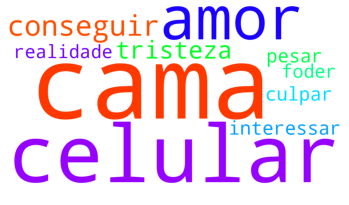

In [ ]:
plot_wordcloud_by_word_probability("lda_pt", 0, lda_pt["topics"], lda_pt["probabilities"])

**Topic 2 - childhood**

{
    "irmao": 0.02317669987678528,
    "apo": 0.018491199240088463,
    "garoto": 0.01407030038535595,
    "livrar": 0.013166399672627449,
    "epoca": 0.012490600347518921,
    "menino": 0.010989800095558167,
    "seriar": 0.01008129958063364,
    "experiencia": 0.00975869968533516,
    "grupar": 0.0094266002997756,
    "comeco": 0.008808700367808342
}


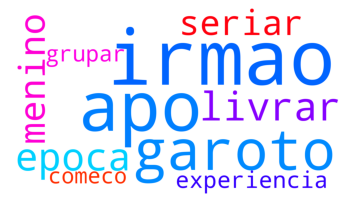

In [ ]:
plot_wordcloud_by_word_probability("lda_pt", 1, lda_pt["topics"], lda_pt["probabilities"])

**Topic 3 - medical treatment**

{
    "tratamento": 0.013014200143516064,
    "corpo": 0.011353399604558945,
    "terapia": 0.011189400218427181,
    "processar": 0.0110536003485322,
    "medir": 0.010957400314509869,
    "drogar": 0.0105961998924613,
    "saude": 0.009634099900722504,
    "psicologo": 0.00959479995071888,
    "exemplo": 0.008426499553024769,
    "ver": 0.00815960019826889
}


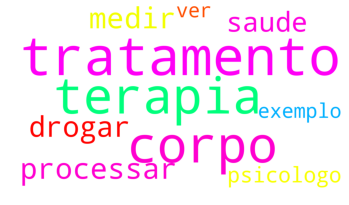

In [ ]:
plot_wordcloud_by_word_probability("lda_pt", 2, lda_pt["topics"], lda_pt["probabilities"])

**Topic 4 - school**

{
    "menino": 0.014168400317430496,
    "saude": 0.013543699868023396,
    "aula": 0.013508499599993229,
    "pq": 0.013359700329601765,
    "professor": 0.011790799908339977,
    "homem": 0.011481200344860554,
    "idade": 0.010641800239682198,
    "epoca": 0.010024799965322018,
    "aluno": 0.009976199828088284,
    "ensinar": 0.009643799625337124
}


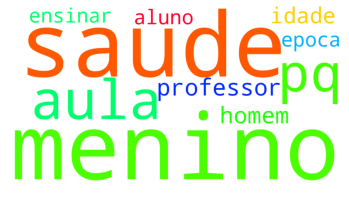

In [ ]:
plot_wordcloud_by_word_probability("lda_pt", 3, lda_pt["topics"], lda_pt["probabilities"])

**Topic 5 - junk topic**

{
    "mulher": 0.02106199972331524,
    "irmao": 0.014519600197672844,
    "cursar": 0.013087799772620201,
    "provar": 0.012638400308787823,
    "maioria": 0.01141239982098341,
    "assunto": 0.01110840030014515,
    "morte": 0.010497000068426132,
    "jogar": 0.009679599665105343,
    "pq": 0.00948879960924387,
    "converso": 0.008508499711751938
}


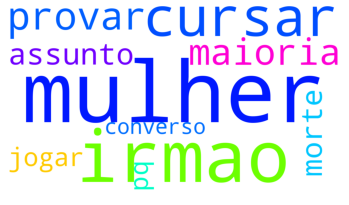

In [ ]:
plot_wordcloud_by_word_probability("lda_pt", 4, lda_pt["topics"], lda_pt["probabilities"])

#### CTM

In [ ]:
ctm_pt = {
    "topics": [], "probabilities": []
}
with np.load(f'{CTM_PT_FOLDER}/8_0.npz') as data:
  t_w_mtx = get_normalized_topic_word_dist(data["topic-word-matrix"]) # ctm's topic word distribution matrix isn't normalized, so we
  #apply softmax to fix that
  topics = data["topics"]
  for i in range(len(topics)):
    ctm_pt["topics"].append(topics[i])
    ctm_pt["probabilities"].append(t_w_mtx[i])
  print(f'there\'s {len(topics)} topics on pt CTM model')

there's 5 topics on pt CTM model


**Topic 1 - student life**

{
    "professorar": 0.018093302845954895,
    "ensinar": 0.017142007127404213,
    "cursar": 0.01515620481222868,
    "empresar": 0.014851969666779041,
    "estudo": 0.013691820204257965,
    "curso": 0.01289847120642662,
    "area": 0.01203113328665495,
    "mercar": 0.011436074040830135,
    "professor": 0.011327618733048439,
    "sociedade": 0.011102668941020966
}


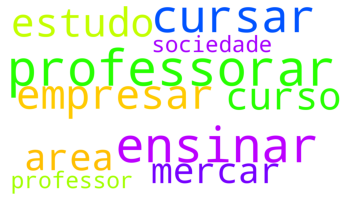

In [ ]:
plot_wordcloud_by_word_probability("ctm_pt", 0, ctm_pt["topics"], ctm_pt["probabilities"])

**Topic 2 - rumination/feelings**

{
    "conseguir": 0.017702823504805565,
    "tentar": 0.014963679946959019,
    "palavra": 0.01427353173494339,
    "tristeza": 0.012764615006744862,
    "voz": 0.012040382251143456,
    "culpar": 0.010576920583844185,
    "garoto": 0.010235550813376904,
    "todo": 0.009951265528798103,
    "propria": 0.008597330190241337,
    "coragem": 0.007939177565276623
}


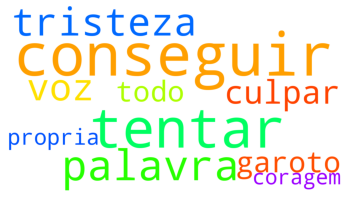

In [ ]:
plot_wordcloud_by_word_probability("ctm_pt", 1, ctm_pt["topics"], ctm_pt["probabilities"])

**Topic 3 - junk topic**

{
    "cima": 0.023156076669692993,
    "quarentenar": 0.021637246012687683,
    "comido": 0.020301030948758125,
    "casamentar": 0.016784287989139557,
    "tio": 0.014847423881292343,
    "desesperar": 0.012819197028875351,
    "aniversariar": 0.012595774605870247,
    "alegria": 0.011088214814662933,
    "mao": 0.009466870687901974,
    "bocar": 0.008812420070171356
}


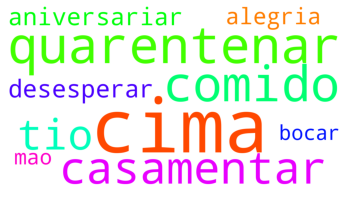

In [ ]:
plot_wordcloud_by_word_probability("ctm_pt", 2, ctm_pt["topics"], ctm_pt["probabilities"])

**Topic 4 - family**

{
    "homem": 0.021761469542980194,
    "menino": 0.018818002194166183,
    "mulher": 0.016825536265969276,
    "filho": 0.01589886285364628,
    "avo": 0.0132257379591465,
    "irmao": 0.012386743910610676,
    "filhar": 0.010885177180171013,
    "foto": 0.01070442609488964,
    "pq": 0.01042660977691412,
    "corpo": 0.010133693926036358
}


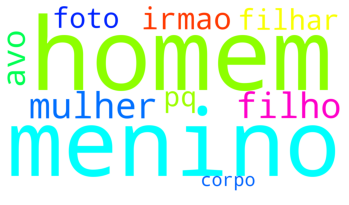

In [ ]:
plot_wordcloud_by_word_probability("ctm_pt", 3, ctm_pt["topics"], ctm_pt["probabilities"])

**Topic 5 - medical treatment**

{
    "psicologo": 0.04118281975388527,
    "tratamento": 0.03572457283735275,
    "remedios": 0.027769098058342934,
    "sintoma": 0.014624430797994137,
    "consulto": 0.011494999751448631,
    "psiquiatro": 0.011043351143598557,
    "saude": 0.00994226336479187,
    "terapia": 0.00973423756659031,
    "panico": 0.00915804784744978,
    "energia": 0.00894127506762743
}


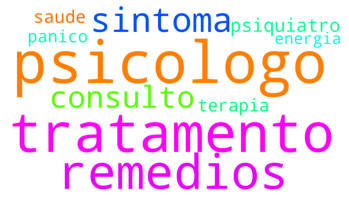

In [ ]:
plot_wordcloud_by_word_probability("ctm_pt", 4, ctm_pt["topics"], ctm_pt["probabilities"])

#### ETM

In [ ]:
etm_pt = {
    "topics": [], "probabilities": []
}
with np.load(f'{ETM_PT_FOLDER}/9_4.npz') as data:
  t_w_mtx = data["topic-word-matrix"]
  topics = data["topics"]
  for i in range(len(topics)):
    etm_pt["topics"].append(topics[i])
    etm_pt["probabilities"].append(t_w_mtx[i])
  print(f'there\'s {len(topics)} topics on pt ETM model')

there's 5 topics on pt ETM model


**Topic 1 - medical treatment**

{
    "tratamento": 0.02664710022509098,
    "remedios": 0.019857700914144516,
    "sintoma": 0.019489599391818047,
    "salariar": 0.018627600744366646,
    "sensacao": 0.015354599803686142,
    "psicologo": 0.015051299706101418,
    "terapia": 0.013714499771595001,
    "efeito": 0.012351799756288528,
    "pandemia": 0.012207499705255032,
    "estar": 0.011203600093722343
}


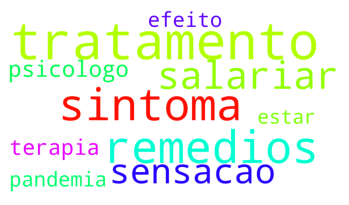

In [ ]:
plot_wordcloud_by_word_probability("etm_pt", 0, etm_pt["topics"], etm_pt["probabilities"])

**Topic 2 - junk topic**

{
    "frente": 0.013168999925255775,
    "garoto": 0.012732500210404396,
    "amor": 0.012085399590432644,
    "corpo": 0.010174600407481194,
    "pq": 0.009325800463557243,
    "raivar": 0.009176099672913551,
    "voltar": 0.009004100225865841,
    "estar": 0.0087866997346282,
    "certeza": 0.008708399720489979,
    "tristeza": 0.008428500033915043
}


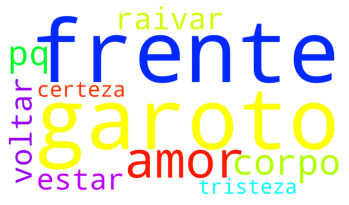

In [ ]:
plot_wordcloud_by_word_probability("etm_pt", 1, etm_pt["topics"], etm_pt["probabilities"])

**Topic 3 - rumination/guilt**

{
    "conseguir": 0.013739700429141521,
    "voltar": 0.01342449989169836,
    "pq": 0.012059899978339672,
    "tristeza": 0.010880599729716778,
    "amor": 0.01066999975591898,
    "fundir": 0.010553300380706787,
    "tentar": 0.010497599840164185,
    "culpar": 0.01038649957627058,
    "morte": 0.009004300460219383,
    "passar": 0.008744800463318825
}


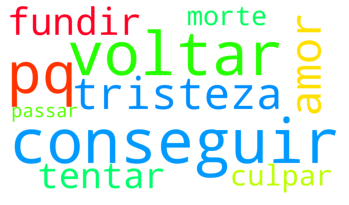

In [ ]:
plot_wordcloud_by_word_probability("etm_pt", 2, etm_pt["topics"], etm_pt["probabilities"])

**Topic 4 - family/childhood**

{
    "irmao": 0.028676899150013924,
    "menino": 0.028090700507164,
    "homem": 0.026430899277329445,
    "mulher": 0.02531149983406067,
    "filho": 0.019742799922823906,
    "avo": 0.018096700310707092,
    "quartar": 0.016425900161266327,
    "crianca": 0.014684000052511692,
    "epoca": 0.013159699738025665,
    "garoto": 0.012930300086736679
}


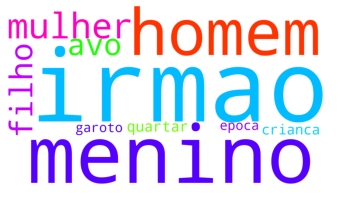

In [ ]:
plot_wordcloud_by_word_probability("etm_pt", 3, etm_pt["topics"], etm_pt["probabilities"])

**Topic 5 - student life**

{
    "aula": 0.021164199337363243,
    "cursar": 0.01970830000936985,
    "area": 0.015716100111603737,
    "empresar": 0.015426600351929665,
    "ensinar": 0.013865799643099308,
    "colega": 0.013649900443851948,
    "epoca": 0.013624800369143486,
    "professor": 0.013557299971580505,
    "professorar": 0.013283899985253811,
    "aluno": 0.01228179968893528
}


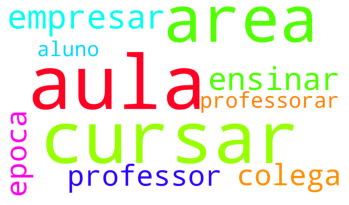

In [ ]:
plot_wordcloud_by_word_probability("etm_pt", 4, etm_pt["topics"], etm_pt["probabilities"])

### English

English models performed better than their portuguese counterparts, regarding both coherence and descriptibility. In this context, the CTM model with 19 topics showed the best results.

The best coherence results for reach architecture are as follows:

* CTM with 19 topics: $NPMI=0.011456$, using $lr=0.019021$;
* LDA with 19 topics: $NPMI=0.010882$;
* ETM with 10 topics: $NPMI=0.008422$, using $lr=0.012396$.

#### LDA

In [ ]:
lda_en = {
    "topics": [], "probabilities": []
}
with np.load(f'{LDA_EN_FOLDER}/6_1.npz') as data:
  t_w_mtx = data["topic-word-matrix"]
  topics = data["topics"]
  for i in range(len(topics)):
    lda_en["topics"].append(topics[i])
    lda_en["probabilities"].append(t_w_mtx[i])
  print(f'there\'s {len(topics)} topics on en LDA model')

there's 19 topics on en LDA model


**Topic 1 - feelings**

{
    "want": 0.038072701543569565,
    "life": 0.03710319846868515,
    "know": 0.03438790142536163,
    "people": 0.031071899458765984,
    "love": 0.025169599801301956,
    "think": 0.01940770074725151,
    "feel": 0.018344100564718246,
    "make": 0.01744139939546585,
    "care": 0.01604430004954338,
    "fuck": 0.01566760055720806
}


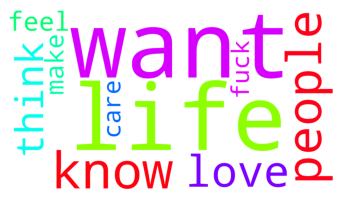

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 0, lda_en["topics"], lda_en["probabilities"])

**Topic 2 - actions (similar to Topic 1)**

{
    "year": 0.033957600593566895,
    "thing": 0.022144999355077744,
    "start": 0.017164399847388268,
    "feel": 0.016073599457740784,
    "change": 0.01576169952750206,
    "life": 0.015598700381815434,
    "go": 0.013276499696075916,
    "make": 0.012592899613082409,
    "try": 0.011575499549508095,
    "think": 0.010728799737989902
}


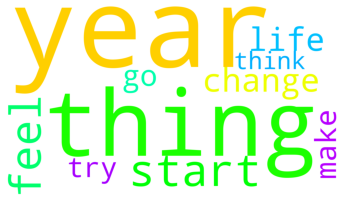

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 1, lda_en["topics"], lda_en["probabilities"])

**Topic 3 - residence**

{
    "go": 0.028408799320459366,
    "live": 0.018826700747013092,
    "leave": 0.017758000642061234,
    "want": 0.017131799831986427,
    "move": 0.017086099833250046,
    "day": 0.015324999578297138,
    "mother": 0.015292399562895298,
    "house": 0.01422400027513504,
    "money": 0.01348359975963831,
    "parent": 0.012580100446939468
}


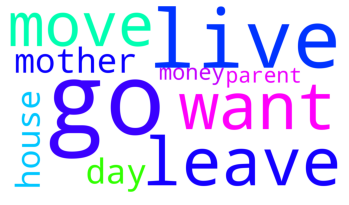

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 2, lda_en["topics"], lda_en["probabilities"])

**Topic 4 - feelings/emotional anguish**

{
    "feel": 0.04779849946498871,
    "go": 0.03572329878807068,
    "know": 0.024993399158120155,
    "want": 0.023431699723005295,
    "night": 0.016182199120521545,
    "time": 0.015278199687600136,
    "cry": 0.014251199550926685,
    "day": 0.013320500031113625,
    "sleep": 0.012286500073969364,
    "get": 0.011143599636852741
}


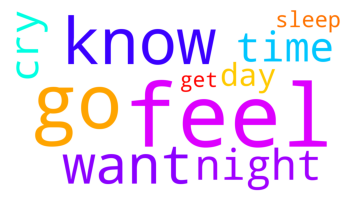

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 3, lda_en["topics"], lda_en["probabilities"])

**Topic 5 - temporal passage**

{
    "get": 0.03980040177702904,
    "go": 0.03259729966521263,
    "tell": 0.015925999730825424,
    "month": 0.014219899661839008,
    "time": 0.014055600389838219,
    "year": 0.013493300415575504,
    "want": 0.01345060020685196,
    "start": 0.013123399578034878,
    "work": 0.012229500338435173,
    "feel": 0.010913600213825703
}


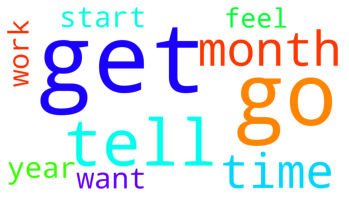

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 4, lda_en["topics"], lda_en["probabilities"])

**Topic 6 - reflection**

{
    "want": 0.02389409951865673,
    "life": 0.023425599560141563,
    "feel": 0.02177640050649643,
    "die": 0.019032400101423264,
    "would": 0.01868719980120659,
    "thing": 0.016126900911331177,
    "think": 0.01572130061686039,
    "make": 0.013056100346148014,
    "go": 0.012999200262129307,
    "live": 0.012676799669861794
}


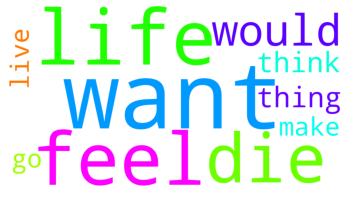

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 5, lda_en["topics"], lda_en["probabilities"])

**Topic 7 - junk topic**

{
    "would": 0.026180600747466087,
    "know": 0.0223471000790596,
    "go": 0.017514599487185478,
    "mom": 0.016010399907827377,
    "say": 0.01550429966300726,
    "school": 0.015147400088608265,
    "think": 0.015146000310778618,
    "tell": 0.014039999805390835,
    "parent": 0.011583000421524048,
    "time": 0.011473099701106548
}


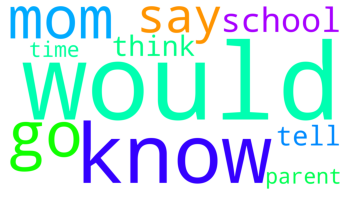

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 6, lda_en["topics"], lda_en["probabilities"])

**Topic 8 - day-to-day activities/school/childhood**

{
    "play": 0.02218789979815483,
    "go": 0.020795799791812897,
    "game": 0.01991490088403225,
    "time": 0.01925789937376976,
    "day": 0.018943699076771736,
    "year": 0.018565699458122253,
    "sleep": 0.018091900274157524,
    "school": 0.016234900802373886,
    "get": 0.014159600250422955,
    "take": 0.013200700283050537
}


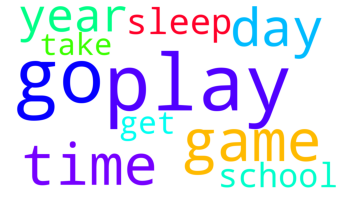

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 7, lda_en["topics"], lda_en["probabilities"])

**Topic 9 - medical treatment**

{
    "take": 0.0442625992000103,
    "doctor": 0.023129500448703766,
    "get": 0.022209899500012398,
    "med": 0.022033600136637688,
    "help": 0.01759590022265911,
    "go": 0.016926400363445282,
    "feel": 0.01631530001759529,
    "medication": 0.01618020050227642,
    "tell": 0.015473299659788609,
    "pill": 0.015359899960458279
}


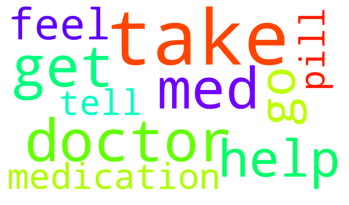

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 8, lda_en["topics"], lda_en["probabilities"])

**Topic 10 - emotions/depression**

{
    "feel": 0.03603750094771385,
    "depression": 0.028092199936509132,
    "know": 0.025927100330591202,
    "life": 0.02026580087840557,
    "people": 0.016135700047016144,
    "depressed": 0.015702400356531143,
    "happy": 0.015342200174927711,
    "help": 0.01482389960438013,
    "make": 0.014106499962508678,
    "thing": 0.012950600124895573
}


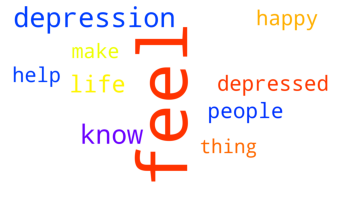

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 9, lda_en["topics"], lda_en["probabilities"])

**Topic 11 - rumination/reflection**

{
    "friend": 0.049322400242090225,
    "feel": 0.03424980118870735,
    "talk": 0.0266014002263546,
    "want": 0.023022400215268135,
    "know": 0.020774099975824356,
    "go": 0.019451599568128586,
    "people": 0.019122999161481857,
    "say": 0.015986600890755653,
    "think": 0.015911299735307693,
    "time": 0.01582529954612255
}


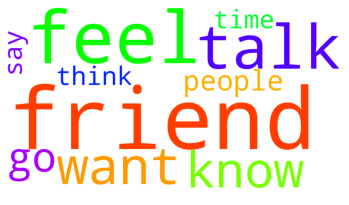

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 10, lda_en["topics"], lda_en["probabilities"])

**Topic 12 - reddit use/social networks**

{
    "class": 0.019621500745415688,
    "help": 0.017819000408053398,
    "reddit": 0.017748400568962097,
    "com": 0.01747730001807213,
    "post": 0.017474200576543808,
    "depression": 0.017444400116801262,
    "http": 0.015020299702882767,
    "edit": 0.014834499917924404,
    "r": 0.014666800387203693,
    "comment": 0.014199299737811089
}


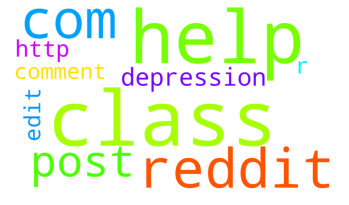

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 11, lda_en["topics"], lda_en["probabilities"])

**Topic 13 - rumination**

{
    "know": 0.04133709892630577,
    "want": 0.03065289929509163,
    "help": 0.03061399981379509,
    "feel": 0.02347010001540184,
    "try": 0.01860780082643032,
    "find": 0.018488800153136253,
    "go": 0.017361899837851524,
    "life": 0.015666000545024872,
    "need": 0.013789700344204903,
    "year": 0.013629299588501453
}


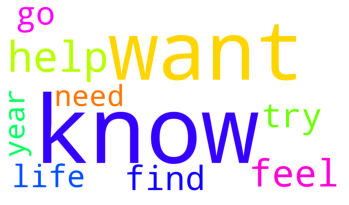

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 12, lda_en["topics"], lda_en["probabilities"])

**Topic 14 - professional life**

{
    "job": 0.029323700815439224,
    "work": 0.024119099602103233,
    "year": 0.021476900205016136,
    "go": 0.019961200654506683,
    "time": 0.01635180041193962,
    "feel": 0.016117099672555923,
    "school": 0.0158098004758358,
    "life": 0.01552680041640997,
    "get": 0.01462430041283369,
    "know": 0.012074699625372887
}


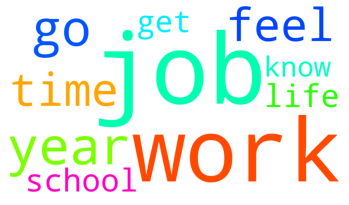

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 13, lda_en["topics"], lda_en["probabilities"])

**Topic 15 - emotional anguish**

{
    "feel": 0.09644149988889694,
    "hate": 0.044521600008010864,
    "life": 0.02007799968123436,
    "go": 0.020003700628876686,
    "make": 0.012857500463724136,
    "try": 0.012485500425100327,
    "bad": 0.012085800059139729,
    "self": 0.011691899970173836,
    "time": 0.011474699713289738,
    "fucking": 0.010945400223135948
}


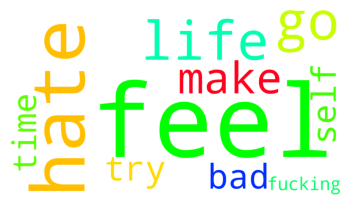

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 14, lda_en["topics"], lda_en["probabilities"])

**Topic 16 - depression/anxiety**

{
    "depression": 0.026973700150847435,
    "go": 0.023170700296759605,
    "year": 0.02202419936656952,
    "anxiety": 0.020330699160695076,
    "get": 0.019076600670814514,
    "help": 0.01620360091328621,
    "feel": 0.014553099870681763,
    "start": 0.013414899818599224,
    "think": 0.01213040016591549,
    "bad": 0.01118869986385107
}


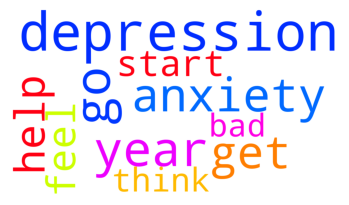

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 15, lda_en["topics"], lda_en["probabilities"])

**Topic 17 - daily routine**

{
    "day": 0.04925059899687767,
    "feel": 0.04358899965882301,
    "make": 0.02230769954621792,
    "go": 0.021615799516439438,
    "eat": 0.018144799396395683,
    "get": 0.016551699489355087,
    "thing": 0.015434199944138527,
    "time": 0.014564700424671173,
    "bed": 0.011867400258779526,
    "today": 0.01149940025061369
}


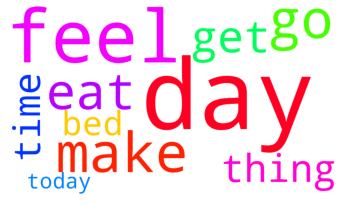

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 16, lda_en["topics"], lda_en["probabilities"])

**Topic 18 - depression related**

{
    "depression": 0.036540500819683075,
    "would": 0.01658090017735958,
    "time": 0.016370000317692757,
    "find": 0.014377100393176079,
    "experience": 0.014203299768269062,
    "think": 0.01252289954572916,
    "feel": 0.01239010039716959,
    "see": 0.01202279981225729,
    "mental": 0.011781900189816952,
    "thing": 0.011195000261068344
}


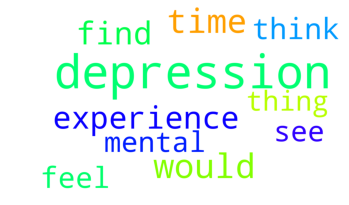

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 17, lda_en["topics"], lda_en["probabilities"])

**Topic 19 - rumination**

{
    "feel": 0.030375799164175987,
    "thought": 0.02830139920115471,
    "think": 0.024195199832320213,
    "want": 0.02093460038304329,
    "go": 0.017443200573325157,
    "know": 0.016420699656009674,
    "people": 0.0163573008030653,
    "thing": 0.01616859994828701,
    "tell": 0.014044400304555893,
    "time": 0.013052700087428093
}


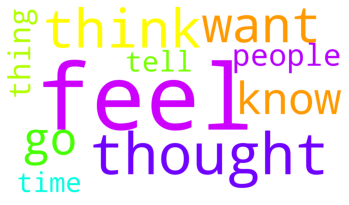

In [ ]:
plot_wordcloud_by_word_probability("lda_en", 18, lda_en["topics"], lda_en["probabilities"])

#### CTM

In [ ]:
ctm_en = {
    "topics": [], "probabilities": []
}
with np.load(f'{CTM_EN_FOLDER}/9_3.npz') as data:
  t_w_mtx = get_normalized_topic_word_dist(data["topic-word-matrix"]) # ctm's topic word distribution matrix isn't normalized, so we
  #apply softmax to fix that
  topics = data["topics"]
  for i in range(len(topics)):
    ctm_en["topics"].append(topics[i])
    ctm_en["probabilities"].append(t_w_mtx[i])
  print(f'there\'s {len(topics)} topics on en CTM model')

there's 19 topics on en CTM model


**Topic 1 - negative feelings**

{
    "feel": 0.00551354605704546,
    "people": 0.005183422472327948,
    "pain": 0.00406744284555316,
    "way": 0.004059019032865763,
    "sadness": 0.004038907587528229,
    "thought": 0.0040174745954573154,
    "emotion": 0.0037916982546448708,
    "happy": 0.003782391082495451,
    "thing": 0.003545349230989814,
    "want": 0.003516255645081401
}


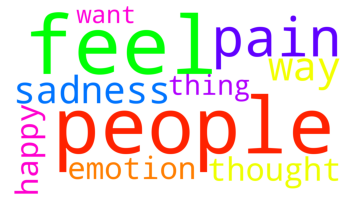

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 0, ctm_en["topics"], ctm_en["probabilities"])

**Topic 2 - depression**

{
    "depression": 0.020998509600758553,
    "help": 0.009080508723855019,
    "feel": 0.007327359635382891,
    "try": 0.005998937413096428,
    "doctor": 0.005515648052096367,
    "take": 0.005363420117646456,
    "week": 0.0053405906073749065,
    "psychiatrist": 0.005162644665688276,
    "day": 0.005052872933447361,
    "anxiety": 0.0049102469347417355
}


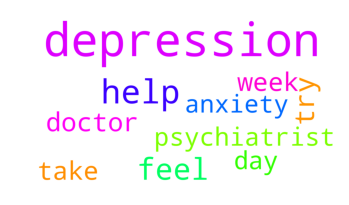

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 1, ctm_en["topics"], ctm_en["probabilities"])

**Topic 3 - bullying/teenage problems**

{
    "wear": 0.002284413203597069,
    "bully": 0.002007438335567713,
    "level": 0.0019673060160130262,
    "serious": 0.001858802861534059,
    "involve": 0.0018407278694212437,
    "bar": 0.00178588239941746,
    "weird": 0.001776832272298634,
    "figure": 0.001767740468494594,
    "grandparent": 0.0017620859434828162,
    "voice": 0.0017515416257083416
}


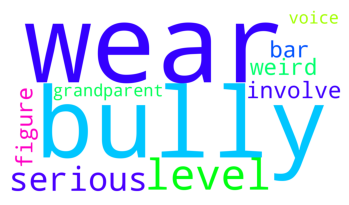

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 2, ctm_en["topics"], ctm_en["probabilities"])

**Topic 4 - school/college**

{
    "work": 0.0169642623513937,
    "job": 0.01416397001594305,
    "school": 0.010130413807928562,
    "semester": 0.008473454974591732,
    "year": 0.007884994149208069,
    "career": 0.0075102634727954865,
    "degree": 0.00670409994199872,
    "go": 0.006144737359136343,
    "class": 0.0061058527790009975,
    "life": 0.005725430324673653
}


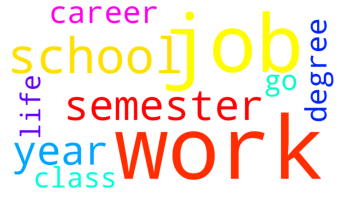

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 3, ctm_en["topics"], ctm_en["probabilities"])

**Topic 5 - negative emotions/sadness**

{
    "sad": 0.005614155903458595,
    "happiness": 0.004797064233571291,
    "sadness": 0.004457553848624229,
    "death": 0.004001294262707233,
    "matter": 0.003728141775354743,
    "hurt": 0.0036504529416561127,
    "wish": 0.0035156176891177893,
    "eye": 0.0034786334726959467,
    "human": 0.0032831754069775343,
    "dead": 0.002952601294964552
}


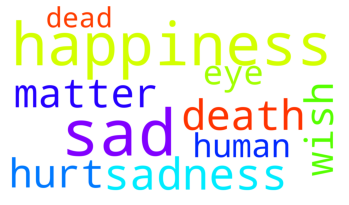

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 4, ctm_en["topics"], ctm_en["probabilities"])

**Topic 6 - online counseling**

{
    "wonder": 0.007331857457756996,
    "diagnose": 0.005802867468446493,
    "reddit": 0.00532857421785593,
    "thank": 0.004728703293949366,
    "comment": 0.00451260432600975,
    "seek": 0.004332466050982475,
    "advice": 0.004244701471179724,
    "therapist": 0.004227235913276672,
    "therapy": 0.004200723022222519,
    "psychiatrist": 0.003752012737095356
}


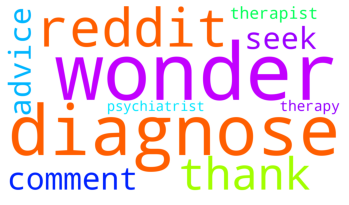

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 5, ctm_en["topics"], ctm_en["probabilities"])

**Topic 7 - interpersonal relationships**

{
    "friend": 0.02583223022520542,
    "people": 0.00825339276343584,
    "talk": 0.00809931568801403,
    "know": 0.006069506518542767,
    "girl": 0.005600148346275091,
    "want": 0.00546442111954093,
    "group": 0.00535642821341753,
    "make": 0.005239586345851421,
    "good": 0.0046517448499798775,
    "text": 0.004508374258875847
}


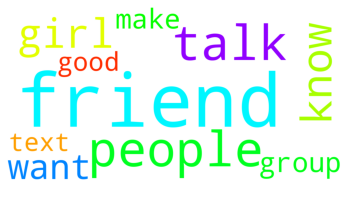

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 6, ctm_en["topics"], ctm_en["probabilities"])

**Topic 8 - somatic complaints**

{
    "wake": 0.007088008802384138,
    "bed": 0.006174107547849417,
    "tired": 0.005583653226494789,
    "dog": 0.005397422704845667,
    "night": 0.004574500024318695,
    "birthday": 0.004509256687015295,
    "death": 0.004479887429624796,
    "sleep": 0.004218905698508024,
    "sick": 0.0035174712538719177,
    "morning": 0.003441301640123129
}


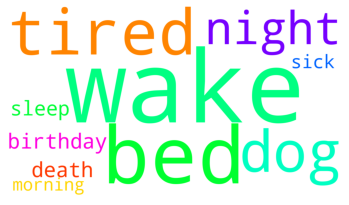

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 7, ctm_en["topics"], ctm_en["probabilities"])

**Topic 9 - reflection/introspection**

{
    "feel": 0.03780664503574371,
    "know": 0.02229275181889534,
    "go": 0.01582055352628231,
    "think": 0.015284670516848564,
    "want": 0.014921274036169052,
    "time": 0.014776158146560192,
    "make": 0.013204825110733509,
    "people": 0.011271587572991848,
    "life": 0.011252772063016891,
    "get": 0.010836618952453136
}


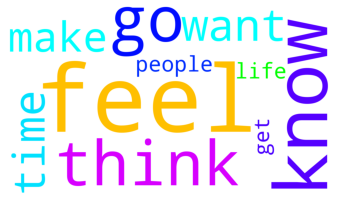

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 8, ctm_en["topics"], ctm_en["probabilities"])

**Topic 10 - junk topic**

{
    "interest": 0.010187655687332153,
    "push": 0.003947789780795574,
    "rest": 0.003759212326258421,
    "name": 0.0035485613625496626,
    "back": 0.00339150452055037,
    "perfect": 0.0033362663816660643,
    "serious": 0.0032333533745259047,
    "free": 0.0031532628927379847,
    "contact": 0.0031225699931383133,
    "club": 0.0028950306586921215
}


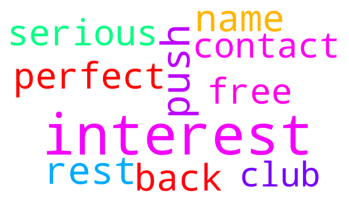

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 9, ctm_en["topics"], ctm_en["probabilities"])

**Topic 11 - stuent life/college**

{
    "college": 0.006924899760633707,
    "job": 0.005903162527829409,
    "school": 0.005601633805781603,
    "class": 0.005286799278110266,
    "graduate": 0.005025109276175499,
    "money": 0.004918487276881933,
    "high": 0.00456283101812005,
    "pay": 0.0043576681055128574,
    "finish": 0.004213316831737757,
    "car": 0.004193061962723732
}


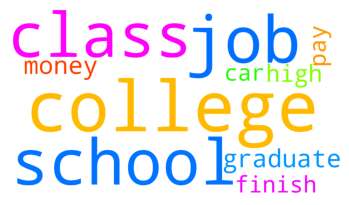

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 10, ctm_en["topics"], ctm_en["probabilities"])

**Topic 12 - family**

{
    "go": 0.01407842431217432,
    "sister": 0.012890533544123173,
    "year": 0.012877668254077435,
    "dad": 0.012641123495995998,
    "get": 0.012265107594430447,
    "father": 0.012016470544040203,
    "mom": 0.011485806666314602,
    "brother": 0.011231829412281513,
    "mother": 0.007711901795119047,
    "tell": 0.007197813596576452
}


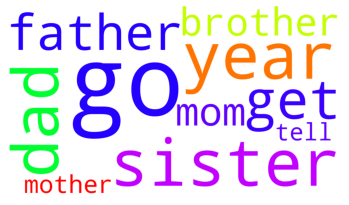

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 11, ctm_en["topics"], ctm_en["probabilities"])

**Topic 13 - emotional anguish**

{
    "fuck": 0.006397726945579052,
    "hate": 0.006219423841685057,
    "girl": 0.00517300283536315,
    "birthday": 0.004940154496580362,
    "love": 0.004621170461177826,
    "woman": 0.0038254386745393276,
    "girlfriend": 0.0037877140566706657,
    "fucking": 0.003617268055677414,
    "kill": 0.0030566437635570765,
    "lonely": 0.0029371229466050863
}


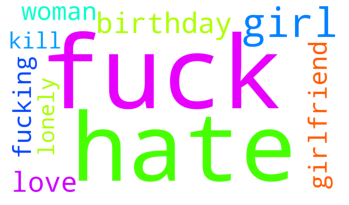

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 12, ctm_en["topics"], ctm_en["probabilities"])

**Topic 14 - junk topic**

{
    "friend": 0.024770289659500122,
    "go": 0.022030416876077652,
    "want": 0.014965874142944813,
    "time": 0.014274089597165585,
    "know": 0.012941598892211914,
    "get": 0.011902609840035439,
    "make": 0.011042688973248005,
    "year": 0.010741041041910648,
    "feel": 0.009855024516582489,
    "people": 0.007248362060636282
}


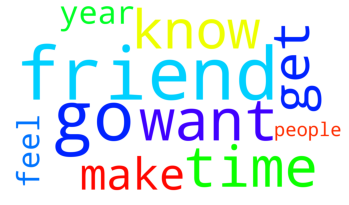

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 13, ctm_en["topics"], ctm_en["probabilities"])

**Topic 15 - junk topic (similar to Topic 14 above)**

{
    "go": 0.03052123263478279,
    "get": 0.018983550369739532,
    "time": 0.01813584566116333,
    "know": 0.01803387701511383,
    "feel": 0.013634140603244305,
    "year": 0.01258860807865858,
    "make": 0.011928794905543327,
    "would": 0.01192353293299675,
    "friend": 0.010088964365422726,
    "thing": 0.009924416430294514
}


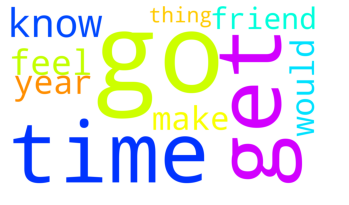

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 14, ctm_en["topics"], ctm_en["probabilities"])

**Topic 16 - social situations**

{
    "contact": 0.00523456372320652,
    "club": 0.0026549941394478083,
    "partner": 0.0026339495088905096,
    "apologize": 0.002426223363727331,
    "figure": 0.002424604259431362,
    "open": 0.0024088984355330467,
    "wear": 0.0022432853002101183,
    "esteem": 0.00223196460865438,
    "mess": 0.002204816322773695,
    "pick": 0.0020384741947054863
}


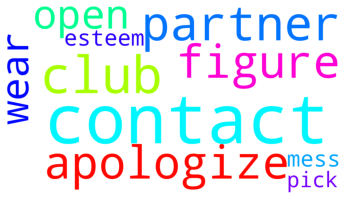

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 15, ctm_en["topics"], ctm_en["probabilities"])

**Topic 17 - introspection/feelings**

{
    "feel": 0.046382155269384384,
    "know": 0.021685859188437462,
    "think": 0.014740831218659878,
    "want": 0.014154721982777119,
    "thing": 0.013041329570114613,
    "make": 0.011415601707994938,
    "people": 0.01094002090394497,
    "life": 0.009258212521672249,
    "time": 0.008964273147284985,
    "go": 0.006603172514587641
}


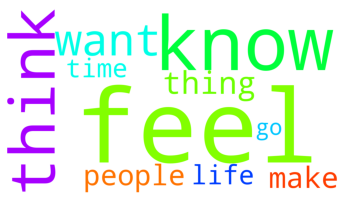

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 16, ctm_en["topics"], ctm_en["probabilities"])

**Topic 18 - medication/medical treatment**

{
    "week": 0.008717024698853493,
    "psychiatrist": 0.008116592653095722,
    "sleep": 0.007425809744745493,
    "med": 0.005887155886739492,
    "appointment": 0.004468934144824743,
    "medication": 0.004133421927690506,
    "pill": 0.004025380127131939,
    "anxiety": 0.0038887010887265205,
    "past": 0.0038540028035640717,
    "tomorrow": 0.0038027032278478146
}


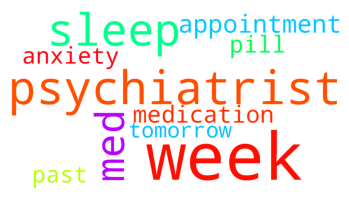

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 17, ctm_en["topics"], ctm_en["probabilities"])

**Topic 19 - social inadequacy**

{
    "contact": 0.007659205701202154,
    "back": 0.007147884927690029,
    "horrible": 0.006985361222177744,
    "interest": 0.00622993428260088,
    "act": 0.005473119206726551,
    "mention": 0.004872876685112715,
    "sound": 0.004794073756784201,
    "send": 0.004754005931317806,
    "serious": 0.004750090651214123,
    "rest": 0.0044208671897649765
}


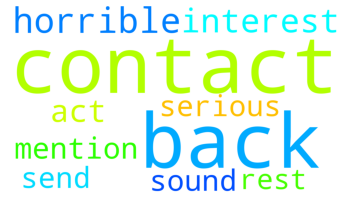

In [ ]:
plot_wordcloud_by_word_probability("ctm_en", 18, ctm_en["topics"], ctm_en["probabilities"])

#### ETM

In [ ]:
etm_en = {
    "topics": [], "probabilities": []
}
with np.load(f'{ETM_EN_FOLDER}/28_2.npz') as data:
  t_w_mtx = data["topic-word-matrix"]
  topics = data["topics"]
  for i in range(len(topics)):
    etm_en["topics"].append(topics[i])
    etm_en["probabilities"].append(t_w_mtx[i])
  print(f'there\'s {len(topics)} topics on en ETM model')

there's 10 topics on en ETM model


**Topic 1 - negative feelings**

{
    "want": 0.0669734999537468,
    "go": 0.040076401084661484,
    "know": 0.03885449841618538,
    "fuck": 0.032349199056625366,
    "people": 0.028208499774336815,
    "make": 0.025934400036931038,
    "feel": 0.02488669939339161,
    "care": 0.022690000012516975,
    "shit": 0.02167939953505993,
    "hate": 0.019863799214363098
}


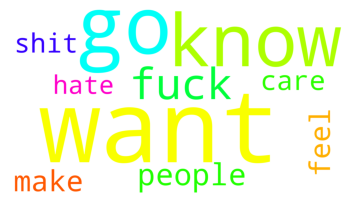

In [ ]:
plot_wordcloud_by_word_probability("etm_en", 0, etm_en["topics"], etm_en["probabilities"])

**Topic 2 - rumination**

{
    "people": 0.03668060153722763,
    "feel": 0.033090200275182724,
    "make": 0.0223447997123003,
    "find": 0.021977899596095085,
    "thing": 0.01960200071334839,
    "think": 0.018733400851488113,
    "see": 0.01712910085916519,
    "seem": 0.014367500320076942,
    "person": 0.013541200198233128,
    "would": 0.013532299548387527
}


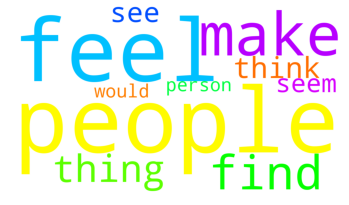

In [ ]:
plot_wordcloud_by_word_probability("etm_en", 1, etm_en["topics"], etm_en["probabilities"])

**Topic 3 - daily routine/work**

{
    "work": 0.04425150156021118,
    "job": 0.034516800194978714,
    "life": 0.02856690064072609,
    "time": 0.02609900012612343,
    "go": 0.024368900805711746,
    "get": 0.022372599691152573,
    "make": 0.018355699256062508,
    "thing": 0.017320599406957626,
    "people": 0.01646530069410801,
    "try": 0.01645210012793541
}


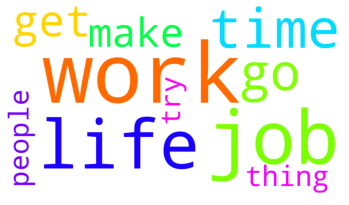

In [ ]:
plot_wordcloud_by_word_probability("etm_en", 2, etm_en["topics"], etm_en["probabilities"])

**Topic 4 - interpersonal relationships**

{
    "friend": 0.0802156999707222,
    "talk": 0.04126349836587906,
    "know": 0.038929201662540436,
    "want": 0.034508898854255676,
    "say": 0.034277599304914474,
    "tell": 0.028917599469423294,
    "would": 0.02506900019943714,
    "love": 0.023419300094246864,
    "guy": 0.022675899788737297,
    "make": 0.022018499672412872
}


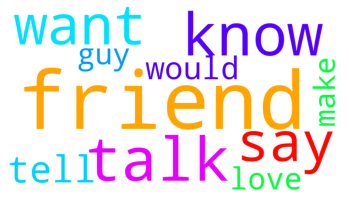

In [ ]:
plot_wordcloud_by_word_probability("etm_en", 3, etm_en["topics"], etm_en["probabilities"])

**Topic 5 - introspection**

{
    "feel": 0.09914620220661163,
    "life": 0.05832450091838837,
    "want": 0.04270949959754944,
    "know": 0.03973279893398285,
    "people": 0.03600750118494034,
    "happy": 0.02601110003888607,
    "think": 0.025253500789403915,
    "thing": 0.021417999640107155,
    "would": 0.01934809982776642,
    "one": 0.018145399168133736
}


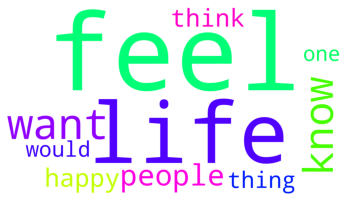

In [ ]:
plot_wordcloud_by_word_probability("etm_en", 4, etm_en["topics"], etm_en["probabilities"])

**Topic 6 - rumination/reminiscence (last, time, bad, past)**

{
    "time": 0.07457809895277023,
    "year": 0.039537400007247925,
    "day": 0.026068199425935745,
    "take": 0.025905799120664597,
    "post": 0.023631200194358826,
    "bad": 0.021971099078655243,
    "past": 0.020876100286841393,
    "end": 0.014096500352025032,
    "last": 0.013729600235819817,
    "point": 0.013614400289952755
}


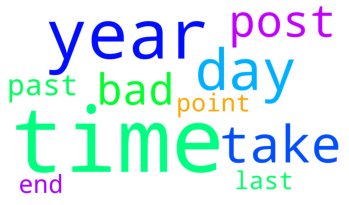

In [ ]:
plot_wordcloud_by_word_probability("etm_en", 5, etm_en["topics"], etm_en["probabilities"])

**Topic 7 - student life/family**

{
    "year": 0.052198298275470734,
    "school": 0.047828301787376404,
    "go": 0.03793159872293472,
    "friend": 0.032633498311042786,
    "college": 0.022664200514554977,
    "get": 0.02114979922771454,
    "parent": 0.021017000079154968,
    "would": 0.020872900262475014,
    "family": 0.019186800345778465,
    "mom": 0.019124099984765053
}


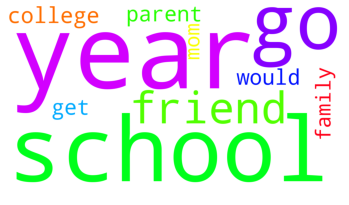

In [ ]:
plot_wordcloud_by_word_probability("etm_en", 6, etm_en["topics"], etm_en["probabilities"])

**Topic 8 - depression/medical treatment**

{
    "depression": 0.08315370231866837,
    "help": 0.04913720116019249,
    "anxiety": 0.02968589961528778,
    "medication": 0.0178506001830101,
    "therapist": 0.016383599489927292,
    "work": 0.01470240019261837,
    "therapy": 0.01430909987539053,
    "try": 0.012859799899160862,
    "problem": 0.012648499570786953,
    "issue": 0.011934500187635422
}


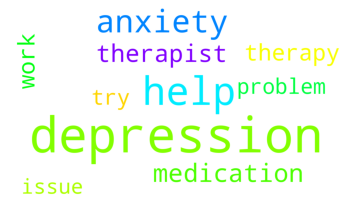

In [ ]:
plot_wordcloud_by_word_probability("etm_en", 7, etm_en["topics"], etm_en["probabilities"])

**Topic 9 - introspection/actions**

{
    "feel": 0.04368849843740463,
    "go": 0.03874579817056656,
    "know": 0.03387580066919327,
    "think": 0.03362410143017769,
    "say": 0.025790000334382057,
    "talk": 0.02463030070066452,
    "see": 0.02456820011138916,
    "get": 0.019403299316763878,
    "tell": 0.019226500764489174,
    "good": 0.017770400270819664
}


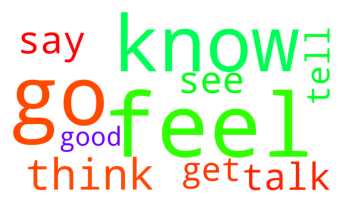

In [ ]:
plot_wordcloud_by_word_probability("etm_en", 8, etm_en["topics"], etm_en["probabilities"])

**Topic 10 - temporal passage**

{
    "day": 0.0652036964893341,
    "go": 0.050467800348997116,
    "time": 0.031514499336481094,
    "sleep": 0.02684669941663742,
    "night": 0.025268200784921646,
    "get": 0.024846600368618965,
    "take": 0.023225100710988045,
    "week": 0.021102799102663994,
    "start": 0.02079630084335804,
    "hour": 0.018561599776148796
}


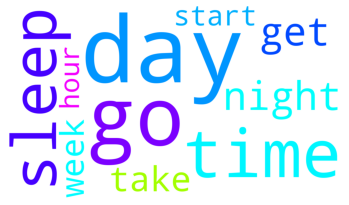

In [ ]:
plot_wordcloud_by_word_probability("etm_en", 9, etm_en["topics"], etm_en["probabilities"])